In [33]:
import pandas as pd
import numpy as np
import csv
import pathlib
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv("nba2021-2022.csv")
df

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,Tue Oct 19 2021,7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,Box Score,NaN,17341.0,Fiserv Forum,NaN
1,Tue Oct 19 2021,10:00p,Golden State Warriors,121,Los Angeles Lakers,114,Box Score,NaN,18997.0,Crypto.com Arena,NaN
2,Wed Oct 20 2021,7:00p,Indiana Pacers,122,Charlotte Hornets,123,Box Score,NaN,15521.0,Spectrum Center,NaN
3,Wed Oct 20 2021,7:00p,Chicago Bulls,94,Detroit Pistons,88,Box Score,NaN,20088.0,Little Caesars Arena,NaN
4,Wed Oct 20 2021,7:30p,Boston Celtics,134,New York Knicks,138,Box Score,2OT,19812.0,Madison Square Garden (IV),NaN
...,...,...,...,...,...,...,...,...,...,...,...
1318,Sun Jun 5 2022,8:00p,Boston Celtics,88,Golden State Warriors,107,Box Score,NaN,18064.0,Chase Center,NaN
1319,Wed Jun 8 2022,9:00p,Golden State Warriors,100,Boston Celtics,116,Box Score,NaN,19156.0,TD Garden,NaN
1320,Fri Jun 10 2022,9:00p,Golden State Warriors,107,Boston Celtics,97,Box Score,NaN,19156.0,TD Garden,NaN
1321,Mon Jun 13 2022,9:00p,Boston Celtics,94,Golden State Warriors,104,Box Score,NaN,18064.0,Chase Center,NaN


In [3]:

# Dropping unneeded columns
df.drop(["Unnamed: 6"], axis = 1, inplace = True)
df.drop(["Notes"], axis = 1, inplace= True) 
df.columns.values[6] = 'Overtimes' # renaming a column


In [4]:
# rename
df.columns.values[6] = 'Overtimes'
df.columns.values[2] = 'Visitor'
df.columns.values[4] = 'Home'



In [5]:
# changing OT column values to integers
df['Overtimes'].fillna(0, inplace=True)
df['Overtimes'].mask(df['Overtimes'] == "OT", 1, inplace=True)
df['Overtimes'].mask(df['Overtimes'] == "2OT", 2, inplace= True)
df['Overtimes'].mask(df['Overtimes'] == "3OT", 3, inplace=True)


In [6]:
# establishing Winner of each game
df['Winner'] = np.where(df['PTS.1'] > df['PTS'], df['Home'], df['Visitor'])
# establish if home team won 
df['Home_team_win'] = np.where(df['PTS.1'] > df['PTS'], True, False)
# 
df["Home_team_win_margin"] = np.where(df['Home_team_win'] == True, df['PTS.1'] - df['PTS'], df['PTS.1'] - df['PTS'])

df["Winner_Margin"] = np.where(df["Winner"] == df["Home"], df["PTS.1"] - df["PTS"], df['PTS'] - df['PTS.1'])
df

,Date,Start (ET),Visitor,PTS,Home,PTS.1,Overtimes,Attend.,Arena,Winner,Home_team_win,Home_team_win_margin,Winner_Margin
0,Tue Oct 19 2021,7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,0,17341.0,Fiserv Forum,Milwaukee Bucks,True,23,23
1,Tue Oct 19 2021,10:00p,Golden State Warriors,121,Los Angeles Lakers,114,0,18997.0,Crypto.com Arena,Golden State Warriors,False,-7,7
2,Wed Oct 20 2021,7:00p,Indiana Pacers,122,Charlotte Hornets,123,0,15521.0,Spectrum Center,Charlotte Hornets,True,1,1
3,Wed Oct 20 2021,7:00p,Chicago Bulls,94,Detroit Pistons,88,0,20088.0,Little Caesars Arena,Chicago Bulls,False,-6,6
4,Wed Oct 20 2021,7:30p,Boston Celtics,134,New York Knicks,138,2,19812.0,Madison Square Garden (IV),New York Knicks,True,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Sun Jun 5 2022,8:00p,Boston Celtics,88,Golden State Warriors,107,0,18064.0,Chase Center,Golden State Warriors,True,19,19
1319,Wed Jun 8 2022,9:00p,Golden State Warriors,100,Boston Celtics,116,0,19156.0,TD Garden,Boston Celtics,True,16,16
1320,Fri Jun 10 2022,9:00p,Golden State Warriors,107,Boston Celtics,97,0,19156.0,TD Garden,Golden State Warriors,False,-10,10
1321,Mon Jun 13 2022,9:00p,Boston Celtics,94,Golden State Warriors,104,0,18064.0,Chase Center,Golden State Warriors,True,10,10


In [7]:
# Formating the time
arr = df['Start (ET)'].T
for f, i in enumerate(arr): # f represents index and i represents element in the numpy array
    
    i = i.replace("p", "")
    i = i.split(":")
    i[0] = i[0].zfill(2)
    i[0] = int(i[0]) + 12
    i[0] = str(i[0])
    i = str(i[0]) + ":" + str(i[1])
    arr[f] = i
df['Start (ET)'] = arr
df

C:\Users\kyle\AppData\Local\Temp\ipykernel_20684\3561100264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[f] = i


,Date,Start (ET),Visitor,PTS,Home,PTS.1,Overtimes,Attend.,Arena,Winner,Home_team_win,Home_team_win_margin,Winner_Margin
0,Tue Oct 19 2021,19:30,Brooklyn Nets,104,Milwaukee Bucks,127,0,17341.0,Fiserv Forum,Milwaukee Bucks,True,23,23
1,Tue Oct 19 2021,22:00,Golden State Warriors,121,Los Angeles Lakers,114,0,18997.0,Crypto.com Arena,Golden State Warriors,False,-7,7
2,Wed Oct 20 2021,19:00,Indiana Pacers,122,Charlotte Hornets,123,0,15521.0,Spectrum Center,Charlotte Hornets,True,1,1
3,Wed Oct 20 2021,19:00,Chicago Bulls,94,Detroit Pistons,88,0,20088.0,Little Caesars Arena,Chicago Bulls,False,-6,6
4,Wed Oct 20 2021,19:30,Boston Celtics,134,New York Knicks,138,2,19812.0,Madison Square Garden (IV),New York Knicks,True,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Sun Jun 5 2022,20:00,Boston Celtics,88,Golden State Warriors,107,0,18064.0,Chase Center,Golden State Warriors,True,19,19
1319,Wed Jun 8 2022,21:00,Golden State Warriors,100,Boston Celtics,116,0,19156.0,TD Garden,Boston Celtics,True,16,16
1320,Fri Jun 10 2022,21:00,Golden State Warriors,107,Boston Celtics,97,0,19156.0,TD Garden,Golden State Warriors,False,-10,10
1321,Mon Jun 13 2022,21:00,Boston Celtics,94,Golden State Warriors,104,0,18064.0,Chase Center,Golden State Warriors,True,10,10


In [8]:
teams = df['Visitor'].unique()
times = df['Start (ET)'].unique()
times


array(['19:30', '22:00', '19:00', '20:00', '20:30', '21:00', '18:00',
       '22:30', '16:00', '21:30', '17:00', '15:30', '13:00', '24:00',
       '14:30', '15:00', '18:30', '24:30', '14:00', '19:45', '16:30'],
      dtype=object)

In [9]:
def teamdf(team):
    strteam = str(team)
    return df[(df['Visitor'] == strteam) | (df['Home'] == strteam)]


In [10]:
Nets = teamdf('Brooklyn Nets') #
GSW_df = teamdf('Golden State Warriors') #
Pacers = teamdf('Indiana Pacers') #

Bulls = teamdf('Chicago Bulls') 
Celtics = teamdf('Boston Celtics') 
Wizards = teamdf('Washington Wizards')#

Cavs = teamdf('Cleveland Cavaliers') 
Rockets = teamdf('Houston Rockets') 
Phil76ers = teamdf('Philadelphia 76ers')#

Magic = teamdf('Orlando Magic') #
Thunder = teamdf('Oklahoma City Thunder')#
Kings = teamdf("Sacramento Kings") #

Nuggets = teamdf('Denver Nuggets') #
Mavs = teamdf('Dallas Mavericks') #
Bucks = teamdf('Milwaukee Bucks') 

Clippers = teamdf('Los Angeles Clippers') 
Knicks = teamdf('New York Knicks') #
Hornets = teamdf('Charlotte Hornets') #

Raptors = teamdf('Toronto Raptors') #
Pelicans = teamdf('New Orleans Pelicans')#
Spurs = teamdf('San Antonio Spurs')#

Suns = teamdf('Phoenix Suns')#
Jazz = teamdf('Utah Jazz') #
Hawks = teamdf('Atlanta Hawks') #

Heat = teamdf('Miami Heat')
Pistons = teamdf('Detroit Pistons')
Griz = teamdf('Memphis Grizzlies') 

Blazers = teamdf('Portland Trail Blazers') 
Lakers = teamdf("Los Angeles Lakers") #
Timber = teamdf("Minnesota Timberwolves")#
df["Visitor"].unique()


array(['Brooklyn Nets', 'Golden State Warriors', 'Indiana Pacers',
       'Chicago Bulls', 'Boston Celtics', 'Washington Wizards',
       'Cleveland Cavaliers', 'Houston Rockets', 'Philadelphia 76ers',
       'Orlando Magic', 'Oklahoma City Thunder', 'Sacramento Kings',
       'Denver Nuggets', 'Dallas Mavericks', 'Milwaukee Bucks',
       'Los Angeles Clippers', 'New York Knicks', 'Charlotte Hornets',
       'Toronto Raptors', 'New Orleans Pelicans', 'San Antonio Spurs',
       'Phoenix Suns', 'Utah Jazz', 'Atlanta Hawks', 'Miami Heat',
       'Detroit Pistons', 'Memphis Grizzlies', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Minnesota Timberwolves'], dtype=object)

In [11]:
all_teams = {"Brooklyn Nets":Nets, 
             "Golden State Warriors" :GSW_df,
             "Indiana Pacers" : Pacers, 

             "Chicago Bulls" : Bulls,
             "Boston Celtics" : Celtics, 
             "Washington Wizards": Wizards,

             "Cleveland Cavaliers": Cavs,  
             "Houston Rockets":Rockets, 
             "Philadelphia 76ers" : Phil76ers, 

             "Orlando Magic" : Magic,
             "Oklahoma City Thunder" : Thunder,
             "Sacramento Kings" : Kings,

             "Denver Nuggets" : Nuggets,
             "Dallas Mavericks" : Mavs,
             "Milwaukee Bucks" : Bucks, 

             "Los Angeles Clippers" : Clippers, 
             "New York Knicks" : Knicks,
             "Charlotte Hornets" : Hornets,

             "Toronto Raptors" : Raptors, 
             "New Orleans Pelicans" : Pelicans, 
             "San Antonio Spurs" : Spurs, 

             "Phoenix Suns" : Suns,
             "Utah Jazz" : Jazz,
             "Atlanta Hawks" : Hawks, 

             "Miami Heat" : Heat,
             "Detroit Pistons" : Pistons,
             "Memphis Grizzlies" : Griz, 
             
             "Portland Trail Blazers" : Blazers, 
             "Los Angeles Lakers" : Lakers,
             "Minnesota Timberwolves" :  Timber}
print(len(all_teams))

30


In [12]:
test214 = Timber[Timber['Home'] == "Minnesota Timberwolves"] 
len(test214)

45

In [13]:
data = []
for team, teamdf in all_teams.items():
    homedf = teamdf[teamdf['Home'] == team] 
    awaydf = teamdf[teamdf['Home'] != team]
    winprop = len(teamdf[teamdf['Winner'] == team]) / len(teamdf)
    assert len(homedf) > 0, team
    home_win_prop =  len(homedf[homedf['Home_team_win'] == True]) / len(homedf)
    away_win_prop = len(awaydf[awaydf['Winner'] == team]) / len(awaydf)
    d = {'Team' : team, 'win_proportion' : winprop, 'home_win_prop' : home_win_prop,  "away_win_prop": away_win_prop}
    data.append(d)
winpropdf = pd.DataFrame(data)

In [14]:
winpropdf.corr()

,win_proportion,home_win_prop,away_win_prop
win_proportion,1.000000,0.944576,0.934692
home_win_prop,0.944576,1.000000,0.766250
away_win_prop,0.934692,0.766250,1.000000


In [15]:
for team, teamdf in all_teams.items():
    
    targetfolder = pathlib.Path('All_teams')

    targetfolder.mkdir(exist_ok=True)
    fname = pathlib.Path(team + ".csv")

    out = targetfolder / fname
    teamdf.to_csv(out)

In [16]:
# stat2019 = pd.read_csv("2019-avgs.csv", na_values = 'TOT')
# stat2020 = pd.read_csv("2020-avgs.csv", na_values = 'TOT')
# stat2021 = pd.read_csv("2021-avgs.csv", na_values= 'TOT')
# stat2022 = pd.read_csv("2022-avgs.csv", na_values = 'TOT')
# stat2019.dropna(inplace=True)
# stat2020.dropna(inplace=True)

# stat2021.dropna(inplace=True)
# stat2022.dropna(inplace=True)

# print(len(stat2019))
# print(len(stat2020))
# print(len(stat2021))
# print(len(stat2022))


FileNotFoundError: [Errno 2] No such file or directory: '2019-avgs.csv'

In [ ]:
allstatyearavg = pd.concat([stat2019, stat2020, stat2021, stat2022])

In [ ]:

allstatyearavg.to_csv("allstatavg.csv")

In [ ]:
allstatyearavg

In [18]:
df#['Attend.']

,Date,Start (ET),Visitor,PTS,Home,PTS.1,Overtimes,Attend.,Arena,Winner,Home_team_win,Home_team_win_margin,Winner_Margin
0,Tue Oct 19 2021,19:30,Brooklyn Nets,104,Milwaukee Bucks,127,0,17341.0,Fiserv Forum,Milwaukee Bucks,True,23,23
1,Tue Oct 19 2021,22:00,Golden State Warriors,121,Los Angeles Lakers,114,0,18997.0,Crypto.com Arena,Golden State Warriors,False,-7,7
2,Wed Oct 20 2021,19:00,Indiana Pacers,122,Charlotte Hornets,123,0,15521.0,Spectrum Center,Charlotte Hornets,True,1,1
3,Wed Oct 20 2021,19:00,Chicago Bulls,94,Detroit Pistons,88,0,20088.0,Little Caesars Arena,Chicago Bulls,False,-6,6
4,Wed Oct 20 2021,19:30,Boston Celtics,134,New York Knicks,138,2,19812.0,Madison Square Garden (IV),New York Knicks,True,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Sun Jun 5 2022,20:00,Boston Celtics,88,Golden State Warriors,107,0,18064.0,Chase Center,Golden State Warriors,True,19,19
1319,Wed Jun 8 2022,21:00,Golden State Warriors,100,Boston Celtics,116,0,19156.0,TD Garden,Boston Celtics,True,16,16
1320,Fri Jun 10 2022,21:00,Golden State Warriors,107,Boston Celtics,97,0,19156.0,TD Garden,Golden State Warriors,False,-10,10
1321,Mon Jun 13 2022,21:00,Boston Celtics,94,Golden State Warriors,104,0,18064.0,Chase Center,Golden State Warriors,True,10,10


In [39]:
attend_margin_corr = df.corr().iloc[4,2]

In [21]:
slope = (df['Home_team_win_margin'].std() / df['Attend.'].std()) * 0.033539	
slope

0.00018604859339082884

In [24]:
intercept = df['Home_team_win_margin'].mean() - (slope * df['Attend.'].mean())
intercept

-1.3077528545713029

AttributeError: module 'matplotlib' has no attribute 'xlabel'

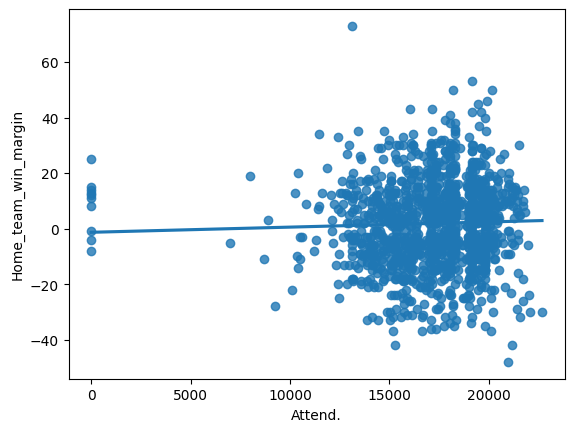

In [34]:
sns.regplot(data=df, x="Attend.", y="Home_team_win_margin", ci=None)
#plt.xlabel('Home Team Point Margin')
#plt.ylabel('Number of People Attending')
#plt.title('Point Margin Based on Attendence')

In [36]:
df["Margin_predicted"] = intercept + (slope * df['Attend.'])

In [37]:
df['residuals'] = df['Home_team_win_margin'] - df["Margin_predicted"]

In [41]:
avg_error = ((1 - (attend_margin_corr ** 2)) ** .5) * df['Home_team_win_margin'].std() 
avg_error

15.311046290889509

In [42]:
print(avg_error, attend_margin_corr)

15.311046290889509 0.03353853094999323
